In [31]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

In [32]:
xr_ds = xr.open_dataset("data/GL_TS_MO_62450.nc")

# Représentation couleur des codes qualité

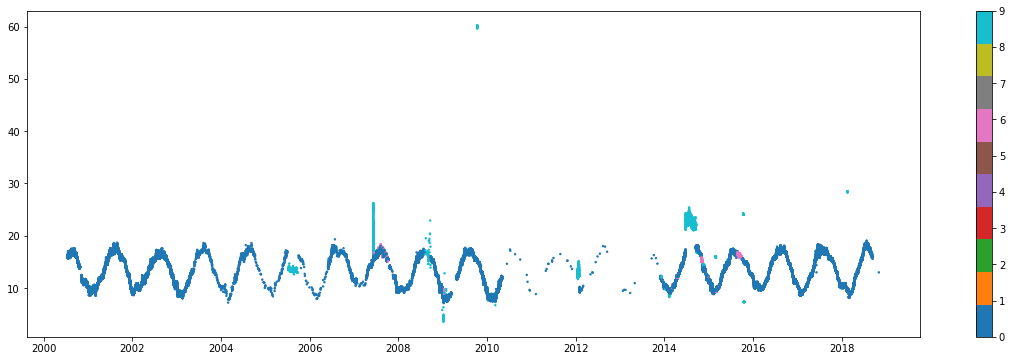

In [92]:
fig, ax = plt.subplots(figsize=(20,6))
cmap = matplotlib.cm.get_cmap('tab10')
normalize = matplotlib.colors.Normalize(vmin=0, vmax=9)
cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)

x = xr_ds.TIME.values
y = xr_ds.TEMP[:,0].values
color = xr_ds.TEMP_QC[:,0].values
ax.scatter(x, y, c=color, s=2, cmap=cmap);

# Filtrage de valeurs par codes qualité

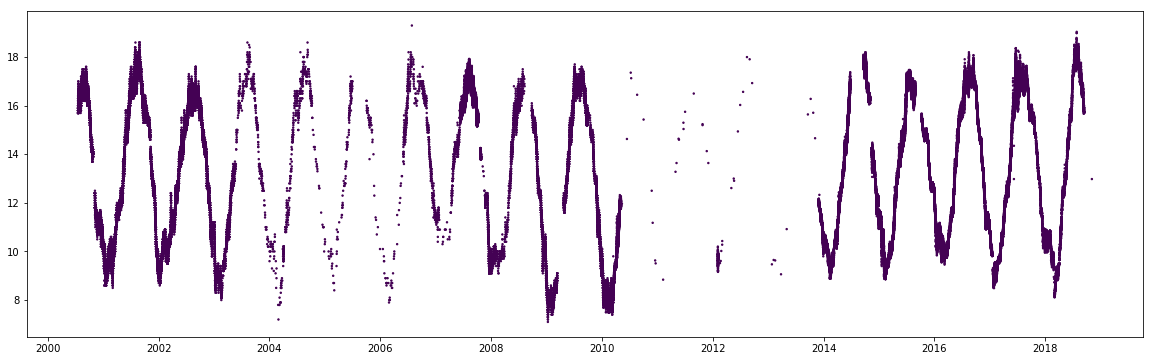

In [87]:
expected_quality_codes = [1, 2]
temp_quality_code = xr_ds.TEMP_QC[:,0]

mask = temp_quality_code.isin(expected_quality_codes)

x = xr_ds.TIME[mask].values
y = xr_ds.TEMP[mask,0].values
color = temp_quality_code[mask].values
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x, y, c=color, s=2, cmap=cmap);